Using the cms_synthetic_claims.db from https://github.com/theradler/Hackathon25/tree/main/cms_synthetic_claims. Change the path to be your path

In [4]:
import pandas as pd
import sqlite3
import os


print(os.path.exists('C:\\Users\\apirolli\\Documents\\Hackathon-2025\\Hackathon25-radler\\cms_synthetic_claims\\cms_synthetic_claims.db'))
# Connect to the local SQLite database
conn = sqlite3.connect('C:\\Users\\apirolli\\Documents\\Hackathon-2025\\Hackathon25-radler\\cms_synthetic_claims\\cms_synthetic_claims.db')

# Run the PRAGMA table_info command for each table
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
for table in tables['name']:
    info = pd.read_sql_query(f"PRAGMA table_info({table});", conn)
    print(f"Table: {table}")
    print(info)
    print()

df_inpatient_claims = pd.read_sql_query("SELECT * FROM raw_cms_claims;", conn)
conn.close()

True
Table: raw_cms_claims
     cid                         name       type  notnull dflt_value  pk
0      0                      BENE_ID    INTEGER        0       None   0
1      1                       CLM_ID    INTEGER        0       None   0
2      2   NCH_NEAR_LINE_REC_IDENT_CD       TEXT        0       None   0
3      3              NCH_CLM_TYPE_CD    INTEGER        0       None   0
4      4                  CLM_FROM_DT  TIMESTAMP        0       None   0
..   ...                          ...        ...      ...        ...  ..
192  192     CLM_UNCOMPD_CARE_PMT_AMT       REAL        0       None   0
193  193                 CLM_LINE_NUM    INTEGER        0       None   0
194  194                     REV_CNTR    INTEGER        0       None   0
195  195                     HCPCS_CD       TEXT        0       None   0
196  196  REV_CNTR_DDCTBL_COINSRNC_CD       REAL        0       None   0

[197 rows x 6 columns]

Table: raw_cms_beneficiary_2025
     cid               name       type  

In [5]:
#  this removal process is slow, lets build up what we want to keep instead
# df_inpatient_claims = df_inpatient_claims.drop(columns=['NCH_NEAR_LINE_REC_IDENT_CD']) # always 'V' because this is inpatient claims
# df_inpatient_claims = df_inpatient_claims.drop(columns=['NCH_CLM_TYPE_CD']) # always 60 because this is inpatient claims
# df_inpatient_claims = df_inpatient_claims.drop(columns=['FI_CLM_PROC_DT']) # always empty, The date the fiscal intermediary completes processing and releases the institutional claim
# df_inpatient_claims = df_inpatient_claims.drop(columns=['CLAIM_QUERY_CODE']) # always 3 Code indicating the type of claim record being processed with respect to payment. 3 is the final bill
# df_inpatient_claims = df_inpatient_claims.drop(columns=['CLM_FAC_TYPE_CD']) # always 1, 'Hospital' https://bluebutton.cms.gov/resources/variables/clm_fac_type_cd/
# df_inpatient_claims = df_inpatient_claims.drop(columns=['CLM_SRVC_CLSFCTN_TYPE_CD']) # always 1, related to the above
# df_inpatient_claims = df_inpatient_claims.drop(columns=['CLM_FREQ_CD']) # always 1, Admit thru discharge claim, https://resdac.org/cms-data/variables/claim-frequency-code-ffs
# df_inpatient_claims = df_inpatient_claims.drop(columns=['FI_NUM']) # always blank https://resdac.org/cms-data/variables/fi-or-mac-number
# df_inpatient_claims = df_inpatient_claims.drop(columns=['CLM_MDCR_NON_PMT_RSN_CD']) # always blank https://resdac.org/cms-data/variables/claim-medicare-non-payment-reason-code

# Select a subset of columns to keep
columns_to_keep = [
    'BENE_ID', # unique beneficiary identifier
    'CLM_ID', # unique claim identifier
    'CLM_FROM_DT', # claim start date
    'CLM_THRU_DT', # claim through date
    'PRVDR_NUM', # provider identifier  number
    'CLM_PMT_AMT', # claim payment amount
    'NCH_PRMRY_PYR_CLM_PD_AMT', # amount paid by primary payer
    # 'FI_CLM_ACTN_CD', always blank The type of action requested by the intermediary to be taken on an institutional claim.
    'PRVDR_STATE_CD', # state code of the provider, not helpful really
    'ORG_NPI_NUM',  # The National Provider Identifier (NPI) of the organization or group practice.
    'AT_PHYSN_NPI', # Claim Attending Physician NPI Number
    'OP_PHYSN_NPI', # Claim Operating Physician NPI Number
    # 'OT_PHYSN_NPI', # Claim Other Physician NPI Number, always blank
    # 'PTNT_DSCHRG_STUS_CD', # Patient Discharge Status Code, always 1
    'CLM_TOT_CHRG_AMT',  # Claim Total Charge Amount
    'CLM_ADMSN_DT',  # Claim Admission Date
    'CLM_IP_ADMSN_TYPE_CD', # The code indicating the type and priority of an inpatient admission associated with the service on an intermediary submitted claim. 
    'CLM_SRC_IP_ADMSN_CD', # The code indicating the source of the referral for the admission or visit.
    'NCH_PTNT_STATUS_IND_CD', # The code indicating the source of the referral for the admission or visit.
    # 'CLM_PASS_THRU_PER_DIEM_AMT', always the same, Claim Pass Thru Per Diem Amount
    'NCH_BENE_IP_DDCTBL_AMT', # The amount of the deductible the beneficiary paid for inpatient services, as originally submitted on the institutional claim.
]

df_inpatient_subset = df_inpatient_claims[columns_to_keep].copy()

df_inpatient_subset.head()

BENE_ID          CLM_ID          CLM_FROM_DT          CLM_THRU_DT  \
0 -10000010254618 -10000930037831  2015-03-25 00:00:00  2015-03-25 00:00:00   
1 -10000010254653 -10000930038030  2015-09-24 00:00:00  2015-09-24 00:00:00   
2 -10000010254653 -10000930038031  2017-05-09 00:00:00  2017-05-10 00:00:00   
3 -10000010254656 -10000930038162  2017-01-14 00:00:00  2017-01-14 00:00:00   
4 -10000010254656 -10000930038162  2017-01-14 00:00:00  2017-01-14 00:00:00   

  PRVDR_NUM  CLM_PMT_AMT  NCH_PRMRY_PYR_CLM_PD_AMT  PRVDR_STATE_CD  \
0     11500        96.65                      0.00               1   
1     17129      6311.88                   6276.88               1   
2     10052      8545.72                      0.00               1   
3     15455      1014.85                    979.85               1   
4     15455      1014.85                    979.85               1   

   ORG_NPI_NUM  AT_PHYSN_NPI  OP_PHYSN_NPI  CLM_TOT_CHRG_AMT  \
0   1578657367    9999870899    9999870899             96.65   
1   1770717738    9999877191    9999877191           6311.88   
2   1598783904    9999995399    9999995399           8545.72   
3   1033215660    9999856690    9999856690           1014.85   
4   1033215660    9999856690    9999856690           1014.85   

          CLM_ADMSN_DT  CLM_IP_ADMSN_TYPE_CD  CLM_SRC_IP_ADMSN_CD  \
0  2015-03-25 00:00:00                     1                    4   
1  2015-09-24 00:00:00                     1                    2   
2  2017-05-09 00:00:00                     3                    1   
3  2017-01-14 00:00:00                     1                    4   
4  2017-01-14 00:00:00                     1                    4   

  NCH_PTNT_STATUS_IND_CD  NCH_BENE_IP_DDCTBL_AMT  
0                      A                     0.0  
1                      A                     0.0  
2                      A                     0.0  
3                      A                     0.0  
4                      A                     0.0

In [6]:
df_inpatient_subset.describe()

BENE_ID        CLM_ID    CLM_PMT_AMT  NCH_PRMRY_PYR_CLM_PD_AMT  \
count  5.806600e+04  5.806600e+04   58066.000000              58066.000000   
mean  -1.000001e+13 -1.000093e+13   13638.307734               2732.677874   
std    9.525039e+03  4.213611e+05   35993.907780              17139.230264   
min   -1.000001e+13 -1.000093e+13      62.440000                  0.000000   
25%   -1.000001e+13 -1.000093e+13     945.370000                  0.000000   
50%   -1.000001e+13 -1.000093e+13    1481.715000                  0.000000   
75%   -1.000001e+13 -1.000093e+13    9932.040000                  0.000000   
max   -1.000001e+13 -1.000093e+13  598716.310000             598077.270000   

       PRVDR_STATE_CD   ORG_NPI_NUM  AT_PHYSN_NPI  OP_PHYSN_NPI  \
count    58066.000000  5.806600e+04  5.806600e+04  5.806600e+04   
mean        25.022767  1.506165e+09  9.999849e+09  9.999849e+09   
std         15.324945  2.919205e+08  1.820012e+05  1.820012e+05   
min          1.000000  1.003028e+09  9.999165e+09  9.999165e+09   
25%         10.000000  1.265846e+09  9.999799e+09  9.999799e+09   
50%         24.000000  1.538146e+09  9.999904e+09  9.999904e+09   
75%         37.000000  1.750310e+09  9.999980e+09  9.999980e+09   
max         53.000000  1.992971e+09  1.000000e+10  1.000000e+10   

       CLM_TOT_CHRG_AMT  CLM_IP_ADMSN_TYPE_CD  CLM_SRC_IP_ADMSN_CD  \
count      58066.000000          58066.000000         58066.000000   
mean       13638.307734              1.499380             3.003668   
std        35993.907780              0.856102             1.589491   
min           62.440000              1.000000             1.000000   
25%          945.370000              1.000000             1.000000   
50%         1481.715000              1.000000             4.000000   
75%         9932.040000              2.000000             5.000000   
max       598716.310000              3.000000             5.000000   

       NCH_BENE_IP_DDCTBL_AMT  
count            58066.000000  
mean                 9.590876  
std                 84.713345  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max               1644.000000

array([[<Axes: title={'center': 'CLM_PMT_AMT'}>]], dtype=object)

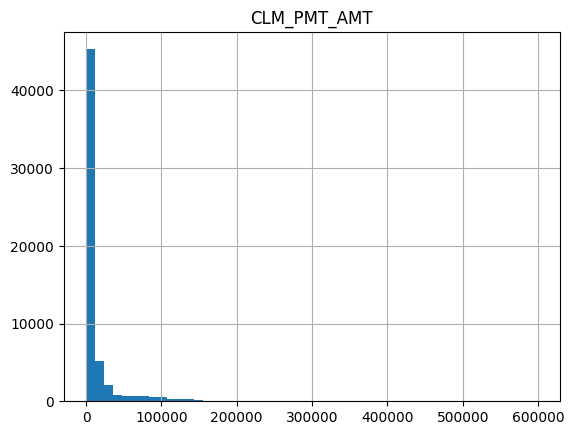

In [8]:
import matplotlib.pyplot as plt

df_inpatient_subset.hist(column='CLM_PMT_AMT', bins=50)

## Summarizing Claims by Suspicious Activity
We will look for potential fraud indicators such as:
- Providers with unusually high total payments or claim counts
- Beneficiaries with many claims
- Claims with very high payment amounts
- Claims with same admission and discharge date (possible upcoding or unnecessary admissions)

In [9]:
# Summarize claims by provider: total payments, claim count, and flag top outliers
provider_summary = df_inpatient_subset.groupby('PRVDR_NUM').agg(
    total_claims=('CLM_ID', 'count'),
    total_payments=('CLM_PMT_AMT', 'sum'),
    avg_payment=('CLM_PMT_AMT', 'mean')
).sort_values(by='total_payments', ascending=False)
provider_summary['is_outlier'] = provider_summary['total_payments'] > provider_summary['total_payments'].quantile(0.99)
provider_summary.head(20)

total_claims  total_payments    avg_payment  is_outlier
PRVDR_NUM                                                         
33S394              302     49141064.60  162718.756954        True
193074              430     39684212.44   92288.866140        True
110083              282     24627219.96   87330.567234        True
100156              142     23779016.94  167457.865775        True
42T087              226     20920835.80   92570.069912        True
210049              174     20166480.38  115899.312529        True
100055              176     20054980.90  113948.755114        True
45T058              203     20021094.67   98626.082118        True
100132              195     18432529.84   94525.794051        True
670023              138     18156491.94  131568.782174        True
331131              348     17856749.38   51312.498218        True
37443               233     12479589.41   53560.469571        True
104040               79     11784722.00  149173.696203        True
311946              148     10516763.35   71059.211824        True
420110              116     10163764.28   87618.657586        True
50426                40      9256106.48  231402.662000        True
327110              232      8334898.62   35926.287155        True
06S011               84      7650852.48   91081.577143        True
440228              205      7207620.79   35159.125805        True
368460              240      6878052.23   28658.550958        True

### Unsupervised Anomaly Detection with One-Class SVM
We will use One-Class SVM to detect anomalous claims based on selected features.

In [10]:
# Feature selection for anomaly detection
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import numpy as np
features = ['CLM_PMT_AMT', 'CLM_TOT_CHRG_AMT', 'NCH_BENE_IP_DDCTBL_AMT']
X = df_inpatient_subset[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_scaled)
df_inpatient_subset['anomaly_score'] = ocsvm.predict(X_scaled)
anomalies = df_inpatient_subset[df_inpatient_subset['anomaly_score'] == -1]
anomalies.head(10)

BENE_ID          CLM_ID          CLM_FROM_DT  \
166  -10000010254734 -10000930040169  2017-12-09 00:00:00   
167  -10000010254734 -10000930040169  2017-12-09 00:00:00   
168  -10000010254734 -10000930040169  2017-12-09 00:00:00   
417  -10000010254916 -10000930048131  2022-12-02 00:00:00   
418  -10000010254916 -10000930048131  2022-12-02 00:00:00   
419  -10000010254916 -10000930048131  2022-12-02 00:00:00   
420  -10000010254916 -10000930048131  2022-12-02 00:00:00   
421  -10000010254916 -10000930048131  2022-12-02 00:00:00   
422  -10000010254916 -10000930048131  2022-12-02 00:00:00   
1099 -10000010255349 -10000930064482  2021-12-28 00:00:00   

              CLM_THRU_DT PRVDR_NUM  CLM_PMT_AMT  NCH_PRMRY_PYR_CLM_PD_AMT  \
166   2017-12-09 00:00:00     15404       555.75                      0.00   
167   2017-12-09 00:00:00     15404       555.75                      0.00   
168   2017-12-09 00:00:00     15404       555.75                      0.00   
417   2022-12-03 00:00:00     15065     58842.99                      0.00   
418   2022-12-03 00:00:00     15065     58842.99                      0.00   
419   2022-12-03 00:00:00     15065     58842.99                      0.00   
420   2022-12-03 00:00:00     15065     58842.99                      0.00   
421   2022-12-03 00:00:00     15065     58842.99                      0.00   
422   2022-12-03 00:00:00     15065     58842.99                      0.00   
1099  2021-12-28 00:00:00     35289       985.23                    533.26   

      PRVDR_STATE_CD  ORG_NPI_NUM  AT_PHYSN_NPI  OP_PHYSN_NPI  \
166                1   1972058055    9999843193    9999843193   
167                1   1972058055    9999843193    9999843193   
168                1   1972058055    9999843193    9999843193   
417                1   1508813163    9999860593    9999860593   
418                1   1508813163    9999860593    9999860593   
419                1   1508813163    9999860593    9999860593   
420                1   1508813163    9999860593    9999860593   
421                1   1508813163    9999860593    9999860593   
422                1   1508813163    9999860593    9999860593   
1099               3   1881085728    9999843292    9999843292   

      CLM_TOT_CHRG_AMT         CLM_ADMSN_DT  CLM_IP_ADMSN_TYPE_CD  \
166             555.75  2017-12-09 00:00:00                     1   
167             555.75  2017-12-09 00:00:00                     1   
168             555.75  2017-12-09 00:00:00                     1   
417           58842.99  2022-12-02 00:00:00                     3   
418           58842.99  2022-12-02 00:00:00                     3   
419           58842.99  2022-12-02 00:00:00                     3   
420           58842.99  2022-12-02 00:00:00                     3   
421           58842.99  2022-12-02 00:00:00                     3   
422           58842.99  2022-12-02 00:00:00                     3   
1099            985.23  2021-12-28 00:00:00                     1   

      CLM_SRC_IP_ADMSN_CD NCH_PTNT_STATUS_IND_CD  NCH_BENE_IP_DDCTBL_AMT  \
166                     5                      A                  525.75   
167                     5                      A                  525.75   
168                     5                      A                  525.75   
417                     4                      A                    0.00   
418                     4                      A                    0.00   
419                     4                      A                    0.00   
420                     4                      A                    0.00   
421                     4                      A                    0.00   
422                     4                      A                    0.00   
1099                    2                      A                  421.97   

      anomaly_score  
166              -1  
167              -1  
168              -1  
417              -1  
418              -1  
419              -1  
420            

#### What does the anomaly detection output mean?
The table below shows the top claims flagged as anomalies by the One-Class SVM model. These claims have unusual combinations of payment amount, total charge, and deductible compared to the rest of the data.
- **anomaly_score = -1**: Claim is considered anomalous (potential fraud/outlier)
- **anomaly_score = 1**: Claim is considered normal
Review the output to investigate claims with anomaly_score = -1 for further analysis.